# Cборный проект-1

**Анализ данных о продажах видеоигр**
_____
**Описание исследования.**
    Используя данные из открытых источников о продажах игр, оценках пользователей и экспертов, жанров и игровых платформах, необходимо выявить закономерности влияющие на успешность игры.
_____
**Цель исследования.**
    
Провести исследование видеоигр для составления плана продаж на следующие годы.
   
_____
**Задачи исследования.**

Необходимо провести предобработку данных, исследовательский анализ о влиянии на продажи различных факторов и статистический анализ.
_____
**Исходные данные.**
    
     Описание данных
    Name — название игры
    Platform — платформа
    Year_of_Release — год выпуска
    Genre — жанр игры
    NA_sales — продажи в Северной Америке (миллионы проданных копий)
    EU_sales — продажи в Европе (миллионы проданных копий)
    JP_sales — продажи в Японии (миллионы проданных копий)
    Other_sales — продажи в других странах (миллионы проданных копий)
    Critic_Score — оценка критиков (максимум 100)
    User_Score — оценка пользователей (максимум 10)
    Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.
______

**Данное исследование разделим на несколько частей.**

***Часть 1. Загрузка данных:***
* [1. Изученеие файлов с данными, получение общей информации](#1-bullet)


***Часть 2.  Предобработка данных:***
* [1. Проверка пропусков и дубликатов.](#2-bullet)
* [2. Обработка столбца name.](#3-bullet)
* [3. Обработка столбца year_of_release.](#4-bullet)
* [4. Обработка столбца critic_score.](#5-bullet)
* [5. Обработка столбца users_score.](#6-bullet)
* [6. Обработка столбца rating.](#7-bullet)
* [7. Создание столбца с суммарными продажами.](#8-bullet)


***Часть 3. Исследовательский анализ данных:***
* [1. Посмотрим сколько игр выпускалось в разные годы.](#9-bullet)
* [2. Посмотрим как менялись продажи по платформам.](#10-bullet)
* [3. Посмотрим как влияют на продажи внутри платформы отзывы пользователей и критиков.](#11-bullet)
* [4. Посмотрим распределение игр по жанрам.](12-bullet)

***Часть 4. Портрет пользователя по регионам:***
* [1. Самые популярные платформы (топ-5).](#13-bullet)
* [2. Самые популярные жанры(топ-5).](#14-bullet)
* [3. Рейтинг игр.](#15-bullet)

***[Часть 5. Проверка гипотез:](#16-bullet)***

***[Часть 6. Общий вывод:](#17-bullet)***



In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as st

#### Загрузка данных

<a id = '1-bullet'></a>
1. Изученеие файлов с данными, получение общей информации.

Выведем информацию о датафрейме и выведем первые строки набора данных.

In [2]:
try:
    games = pd.read_csv('/datasets/games.csv')
except:
    games = pd.read_csv('https://code.s3.yandex.net/datasets/games.csv')

games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [3]:
games.head(10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


    Описание данных
    Name — название игры
    Platform — платформа
    Year_of_Release — год выпуска
    Genre — жанр игры
    NA_sales — продажи в Северной Америке (миллионы проданных копий)
    EU_sales — продажи в Европе (миллионы проданных копий)
    JP_sales — продажи в Японии (миллионы проданных копий)
    Other_sales — продажи в других странах (миллионы проданных копий)
    Critic_Score — оценка критиков (максимум 100)
    User_Score — оценка пользователей (максимум 10)
    Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

#### Предобработка данных

<a id = '2-bullet'></a>
##### Проверка пропусков и дубликатов.

Проверим датафрейм на явные дубликаты и пропуски, затем будем обрабатывать данные по столбцам проверяя на неявные дубликаты, заполняя пропуски и меняя тип данных где это необходимо

In [4]:
games.columns = games.columns.str.lower() #переведем названия столбцов в нижний регистр

In [5]:
games.duplicated().sum() #проверка явных дубликатов

0

In [6]:
games.isna().sum() # проверка пропусков в столбцах

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64

<a id = '3-bullet'></a>
##### Обработка столбца name

In [7]:
 games.loc[ games['name'].isna()] #выведем две строки с нулевым значением в имени

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


In [8]:
games = games.dropna(subset=['name']) # удалим эти строки, т.к. они выглядят аномальными и не повлияют на анализ


    Рассмотрим по столбцам:
        - для столбца name были удалены две строки, т.к. при выведении их на экран увидела что там практически нет ценной информации и их всего две, возможно была какая то техническая ошибка
        - для столбца с годом выпуска и оценками критиков -пустые значения были заменены на заглушки 0, это позволило сохранить данные и поменять тип столбца. Пустые значения года выпуска возможно тоже какая то техническая ошибка.
        - для столбца с оценками значения TBD были заменены на пустые значения, чтобы изменить тип данных.
        Пустые значения в столбцах с оценками могли возникнуть из-за того что данные предоставлены с 80х годов, в то время вполне могли не практиковать выставление оценок. Либо по тем играм по которым недостаточно отзывов(оценок).
        Все заглушки и пустые значения отсекались при анализе соответствующих столбцов.
        Мне всегда хочется дать второй шанс данным и выжать из них максимум, поэтому удаляю в крайнем случае.
        Для столбца с рейтингами пустое значение заменила на "Рейтинг не определен", эти рейтинги выставляет Американская ассоциация, вполне возможно не все игры выходят на американский рынок и они могут не иметь этого рейтинга.


In [9]:
 games.loc[ games['year_of_release'].isna()].sample(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
805,Rock Band,Wii,NaN,Misc,1.33,0.56,0.00,0.20,80.0,6.3,T
6342,Gun,X360,NaN,Shooter,0.24,0.01,0.00,0.02,75.0,7.5,M
1585,Combat,2600,NaN,Action,1.17,0.07,0.00,0.01,NaN,NaN,NaN
15557,Yu-Gi-Oh! 5D's Wheelie Breakers (JP sales),Wii,NaN,Racing,0.00,0.00,0.02,0.00,NaN,NaN,NaN
1506,Adventure,2600,NaN,Adventure,1.21,0.08,0.00,0.01,NaN,NaN,NaN
11943,Dream Trigger 3D,3DS,NaN,Shooter,0.04,0.02,0.00,0.01,54.0,6.3,E
2492,MLB SlugFest 20-03,PS2,NaN,Sports,0.41,0.32,0.00,0.11,77.0,8.2,E
14950,Combat Wings: The Great Battles of WWII,Wii,NaN,Simulation,0.02,0.00,0.00,0.00,NaN,NaN,NaN
678,LEGO Indiana Jones: The Original Adventures,Wii,NaN,Action,1.51,0.61,0.00,0.21,78.0,6.6,E10+
9516,Nintendo Puzzle Collection,GC,NaN,Puzzle,0.00,0.00,0.13,0.00,NaN,NaN,NaN


In [10]:
games.loc[ games['critic_score'].isna()].sample(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
12989,Rockin' Pretty,DS,2009.0,Misc,0.05,0.00,0.00,0.00,NaN,tbd,E
4107,Vigilante 8: 2nd Offense,PS,1999.0,Racing,0.27,0.18,0.00,0.03,NaN,NaN,NaN
8855,T'ai Fu: Wrath of the Tiger,PS,1998.0,Action,0.08,0.06,0.00,0.01,NaN,NaN,NaN
11662,The Idolm@ster,X360,2007.0,Simulation,0.00,0.00,0.08,0.00,NaN,NaN,NaN
16618,Xblaze: Lost Memories,PSV,2015.0,Adventure,0.01,0.00,0.00,0.00,NaN,7,M
1339,SNK vs. Capcom: The Match of the Millennium,PSP,2006.0,Fighting,0.53,0.57,0.00,0.34,NaN,NaN,NaN
9530,Puyo Puyo!! 20th Anniversary,3DS,2011.0,Puzzle,0.00,0.00,0.13,0.00,NaN,NaN,NaN
8293,.hack//G.U. Vol.3//Redemption,PS2,2007.0,Role-Playing,0.00,0.00,0.17,0.00,NaN,NaN,NaN
8094,Gokujou Parodius,SNES,1994.0,Shooter,0.00,0.00,0.18,0.00,NaN,NaN,NaN
2708,Lost Planet 2,X360,2010.0,Shooter,0.38,0.23,0.08,0.06,NaN,NaN,NaN


In [11]:
games['name'].isna().sum()

0

In [12]:
games['name'] =games['name'].str.lower() #приведем названия игр в нижний регистр

In [13]:
# уникальных значений в столбце с играми достаточно много
# попробуем проверить неявные дубликаты в сочетании с платформой и годом выпуска
games[games.duplicated(['name', 'platform', 'year_of_release'])]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
16230,madden nfl 13,PS3,2012.0,Sports,0.0,0.01,0.0,0.0,83.0,5.5,E


In [14]:
games[games['name']=='madden nfl 13']

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
507,madden nfl 13,X360,2012.0,Sports,2.53,0.15,0.0,0.17,81.0,5.8,E
604,madden nfl 13,PS3,2012.0,Sports,2.11,0.22,0.0,0.23,83.0,5.5,E
3986,madden nfl 13,Wii,2012.0,Sports,0.47,0.00,0.0,0.03,NaN,7.3,E
5887,madden nfl 13,PSV,2012.0,Sports,0.28,0.00,0.0,0.02,63.0,7.3,E
7066,madden nfl 13,WiiU,2012.0,Sports,0.21,0.00,0.0,0.02,75.0,6.7,E
16230,madden nfl 13,PS3,2012.0,Sports,0.00,0.01,0.0,0.00,83.0,5.5,E


In [15]:
games = games.drop(16230) #удалим дубликат

<a id = '4-bullet'></a>
##### Обработка столбца year_of_release

In [16]:
 games['year_of_release'].unique() 

array([2006., 1985., 2008., 2009., 1996., 1989., 1984., 2005., 1999.,
       2007., 2010., 2013., 2004., 1990., 1988., 2002., 2001., 2011.,
       1998., 2015., 2012., 2014., 1992., 1997., 1993., 1994., 1982.,
       2016., 2003., 1986., 2000.,   nan, 1995., 1991., 1981., 1987.,
       1980., 1983.])

In [17]:
games['year_of_release'] = games['year_of_release'].fillna(0) # заменим пропуски года выпуска на 0

In [18]:
# заменим значения столбца с годом выпуска игры на целочисленный тип
games['year_of_release'] = games['year_of_release'].astype('int')

<a id = '5-bullet'></a>
##### Обработка столбца critic_score

In [19]:
 games['critic_score'].unique() 

array([76., nan, 82., 80., 89., 58., 87., 91., 61., 97., 95., 77., 88.,
       83., 94., 93., 85., 86., 98., 96., 90., 84., 73., 74., 78., 92.,
       71., 72., 68., 62., 49., 67., 81., 66., 56., 79., 70., 59., 64.,
       75., 60., 63., 69., 50., 25., 42., 44., 55., 48., 57., 29., 47.,
       65., 54., 20., 53., 37., 38., 33., 52., 30., 32., 43., 45., 51.,
       40., 46., 39., 34., 35., 41., 36., 28., 31., 27., 26., 19., 23.,
       24., 21., 17., 22., 13.])

In [20]:
# убедились, что оценки критиков имеют значения от 1 до 100 с шагом 1, 
# заменим пропуски на 0, а тип данных на целочисленное значение
games['critic_score'] = games['critic_score'].fillna(0)
games['critic_score'] = games['critic_score'].astype('int')

<a id = '6-bullet'></a>
##### Обработка столбца user_score

In [21]:
 games['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

Значение 'tbd' это абривеатура, которая переводится как "подлежит определению", предполагаю что можно заменить эти ячейки на пустые значения, это позволит изменить тип столбца из строкового в тип число.

In [22]:
games['user_score'].loc[games['user_score']=='tbd'] = np.nan

/opt/conda/lib/python3.9/site-packages/pandas/core/indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [23]:
games['user_score'] = games['user_score'].astype('float') # изменение типа данных

In [24]:
 games['user_score'].unique() # проверим, несмотря на предупреждение все сработало как нужно

array([8. , nan, 8.3, 8.5, 6.6, 8.4, 8.6, 7.7, 6.3, 7.4, 8.2, 9. , 7.9,
       8.1, 8.7, 7.1, 3.4, 5.3, 4.8, 3.2, 8.9, 6.4, 7.8, 7.5, 2.6, 7.2,
       9.2, 7. , 7.3, 4.3, 7.6, 5.7, 5. , 9.1, 6.5, 8.8, 6.9, 9.4, 6.8,
       6.1, 6.7, 5.4, 4. , 4.9, 4.5, 9.3, 6.2, 4.2, 6. , 3.7, 4.1, 5.8,
       5.6, 5.5, 4.4, 4.6, 5.9, 3.9, 3.1, 2.9, 5.2, 3.3, 4.7, 5.1, 3.5,
       2.5, 1.9, 3. , 2.7, 2.2, 2. , 9.5, 2.1, 3.6, 2.8, 1.8, 3.8, 0. ,
       1.6, 9.6, 2.4, 1.7, 1.1, 0.3, 1.5, 0.7, 1.2, 2.3, 0.5, 1.3, 0.2,
       0.6, 1.4, 0.9, 1. , 9.7])

<a id = '7-bullet'></a>
##### Обработка столбца rating

In [25]:
 games['rating'].unique()

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

    Система ESRB - США, Мексика и Канада
    EC	Для детей младшего возраста. Подходит для детей от 3 лет.
    K-A kids-to-adult детям и взрослым
    E	Подходит для всех возрастных категорий. 
    E 10+	Подходит для лиц старше 10 лет. 
    T	Подходит для лиц старше 13 лет. 
    M	Подходит для лиц старше 17 лет. 
    AO	Подходит для взрослых старше 18 лет. 
    RP	Категория ещё не присвоена. Играм с категорией RP еще не присвоен окончательный рейтинг ESRB.
    Заменим пустые значения на тип RP

In [26]:
games['rating'] = games['rating']. fillna ('RP') # заменим пустые значения на рейтинг не определен

In [27]:
games['rating'].unique()

array(['E', 'RP', 'M', 'T', 'E10+', 'K-A', 'AO', 'EC'], dtype=object)

In [28]:
games.info() # выведем информацию о датафрейме после всех изменений

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16712 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16712 non-null  object 
 1   platform         16712 non-null  object 
 2   year_of_release  16712 non-null  int64  
 3   genre            16712 non-null  object 
 4   na_sales         16712 non-null  float64
 5   eu_sales         16712 non-null  float64
 6   jp_sales         16712 non-null  float64
 7   other_sales      16712 non-null  float64
 8   critic_score     16712 non-null  int64  
 9   user_score       7589 non-null   float64
 10  rating           16712 non-null  object 
dtypes: float64(5), int64(2), object(4)
memory usage: 1.5+ MB


In [29]:
games.isna().sum() # проверка пропусков в столбцах

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score          0
user_score         9123
rating                0
dtype: int64

<a id = '8-bullet'></a>
##### Создание столбца с суммарными продажами

In [30]:
games['total_sales'] = games['na_sales']+games['eu_sales']+games['jp_sales']+games['other_sales']
games[games['year_of_release']==1985].head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
1,super mario bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,0,NaN,RP,40.24
374,kung fu,NES,1985,Action,1.64,0.38,1.42,0.06,0,NaN,RP,3.50
869,soccer,NES,1985,Sports,0.18,0.23,1.53,0.02,0,NaN,RP,1.96
1262,ice climber,NES,1985,Platform,0.46,0.10,0.92,0.02,0,NaN,RP,1.50
1482,gyromite,NES,1985,Puzzle,0.73,0.16,0.40,0.03,0,NaN,RP,1.32


   **Вывод**
         
         Были обработаны явные и неявные дубликаты, пустые значения в предложенном датафрейме, а так же измененены некоторые типы данных для удобства дальнейшего исследования.
         
         Пропуски могли возникнуть по нескольким причинам. Т.к. временной период достаточно большой, вполне возможно в более райнние годы появления не практиковалось составление рейтингов для игр, оценки критиков и пользователей.Так же возможны технические ошибки при составление датафрейма, данные явно набирались из разных мсточников. Пропуски в оценках видеоигр еще возможны, если отзывов на конкретную игру крайне мало.
         
         Для обработки пропусков использовали следующие способы: 
    * в столбцах year_of_release и critic_score пропуски заменили значением 0, этого значения нет в этих столбцах, его легко можно будет отсортировать при необходимости, изменили тип данных на целое число;
    * в столбце user_score оставили пустые значения и также изменили на пустое значение, там где оценка не определена, чтобы привести в цифровой тип данных;
    * в столбце rating заменили пустые значения на RP - рейтинг не определен;
    
    Добавили в датафрейм столбец с общими продажами по всем регионам
     

#### Исследовательский анализ данных

<a id = '9-bullet'></a>
##### Посмотрим сколько игр выпускалось в разные годы

Text(0.5, 1.0, 'Распределение выпускаемых игр по годам')

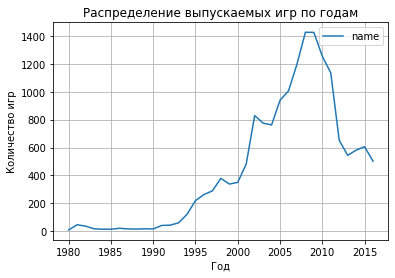

In [31]:
games[games['year_of_release'] !=0].pivot_table(index='year_of_release', values='name', aggfunc='count').plot(grid=True)
plt.xlabel('Год')
plt.ylabel('Количество игр')
plt.title('Распределение выпускаемых игр по годам')

Text(0.5, 1.0, 'Распределение выпускаемых игр по годам без дубликатов')

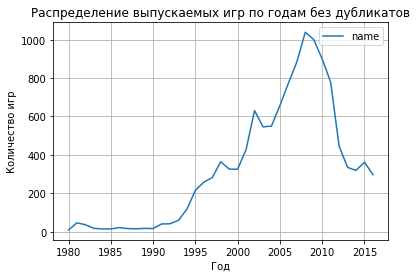

In [32]:
games_2 = games[games.duplicated(['name', 'year_of_release'])==False]
games_2[games_2['year_of_release'] !=0].pivot_table(index='year_of_release', values='name', aggfunc='count').plot(grid=True)
plt.xlabel('Год')
plt.ylabel('Количество игр')
plt.title('Распределение выпускаемых игр по годам без дубликатов')

Если не учитывать одни и теже игры выпущенные в одном году на разных платформах, график получится таки же по форме, но с пиком по количеству игр меньше.

Данные представлены с 1980 года, далее количество игр постепенно увеличивалось, пик выпуска игр приходится на 2007-2009гг, далее количество игр идет на спад, предполагаю это связано с развитием мобильных игр. Для дальнейшего анализа можно не использовать данные до 1990 года, в связи со значительно меньшем количестве игр.

<a id = '10-bullet'></a>
##### Посмотрим как менялись продажи по платформам

In [33]:
# выберем топ 10 платформ с наибольшими суммарными продажами, отсекая данные до 1990
top_platform = games[games['year_of_release'] >1990].pivot_table(
    index='platform', values='total_sales', aggfunc='sum').sort_values(
    by = 'total_sales', ascending = False).head(10)
top_platform

,total_sales
platform,
PS2,1233.56
X360,961.24
PS3,931.33
Wii,891.18
DS,802.76
PS,727.58
PS4,314.14
GBA,312.88
PSP,289.53


Text(0.5, 1.0, 'Топ-10 платформ по суммарным продажам')

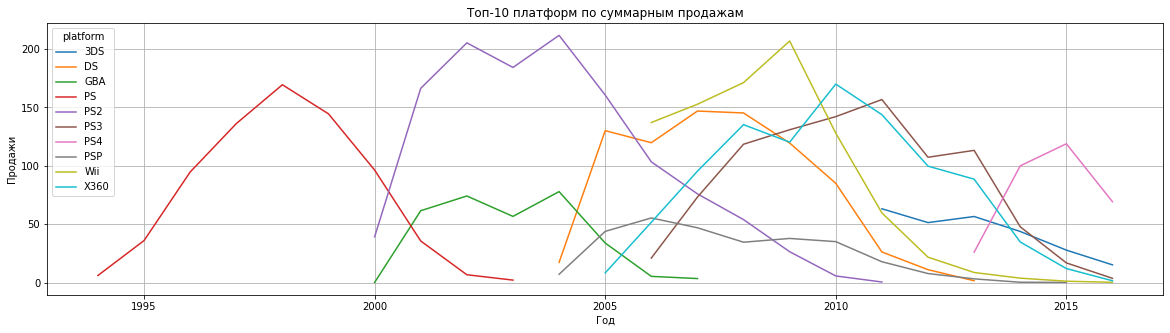

In [34]:
# построим графики продаж по платформам из топ 10 

games_top_platform = games[games['year_of_release'] >1990].query('platform in @top_platform.index').pivot_table(
    index='year_of_release', columns='platform', values='total_sales', aggfunc='sum').reset_index() 
# games_top_platform датафрейм с топ-10 платформ по продажам

games_top_platform.plot(grid=True, figsize = (20,5), x='year_of_release')
plt.xlabel('Год')
plt.ylabel('Продажи')
plt.title('Топ-10 платформ по суммарным продажам')

Из графика видно что средний срок активной работы платформы 5-7 лет. Компания Sony выпускает новую платформу, когда продажи по след идут на спад. Скоро должна выйти новая платформа (PS4 Pro вышла в ноябре 2016 г)

In [35]:
# рассчитаем средний срок работы платформы по всему датафрейму
platform_work_period = games[games['year_of_release'] !=0].pivot_table(
    index='platform', values='year_of_release', aggfunc=['min', 'max'])
platform_work_period['period'] = platform_work_period['max'] - platform_work_period['min'] +1
platform_work_period['period'].median() 
#берем медиану тк платформа PC выпускает игры на прояжении всего периода исследования, что исказит средний период работы платформ

7.0

Будем использовать данные с 2013 по 2016гг.

In [36]:
games_act = games.loc[games['year_of_release']>2012] # датафрейм с данными с 2013 по 2016 гг

In [37]:
# выберем топ-8 платформ по суммарным продажам за последние 4 года

top_platform_act = games_act.pivot_table(index='platform', values='total_sales', aggfunc='sum').sort_values(
    by = 'total_sales', ascending = False).head(8)
top_platform_act

,total_sales
platform,
PS4,314.14
PS3,181.43
XOne,159.32
3DS,143.25
X360,136.80
WiiU,64.63
PC,39.43
PSV,32.99


Text(0.5, 1.0, 'Топ-8 платформ по суммарным продажам за актуальный период')

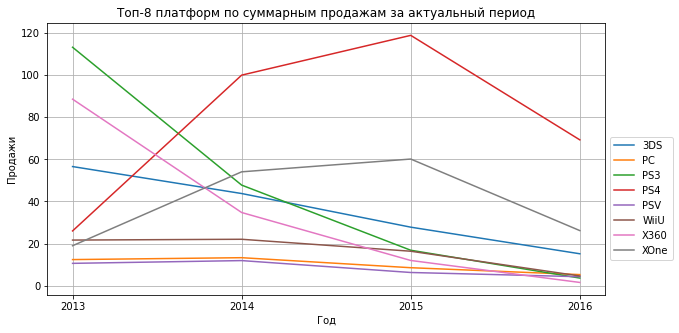

In [38]:
# построим графики продаж для топ-8 платформ за актуальный период
sales_act_top_platform = games_act.query('platform in @top_platform_act.index').pivot_table(
    index='year_of_release', columns='platform', values='total_sales', aggfunc='sum').reset_index()
sales_act_top_platform.plot(grid=True, figsize = (10,5), x='year_of_release')
plt.legend(bbox_to_anchor=(1, 0.6))
plt.xticks([2013, 2014, 2015, 2016])
plt.xlabel('Год')
plt.ylabel('Продажи')
plt.title('Топ-8 платформ по суммарным продажам за актуальный период')

In [39]:
sales_act_top_platform # сводная таблица по продажам на топ-8 платоформах

platform,year_of_release,3DS,PC,PS3,PS4,PSV,WiiU,X360,XOne
0,2013,56.57,12.38,113.25,25.99,10.59,21.65,88.58,18.96
1,2014,43.76,13.28,47.76,100.00,11.90,22.03,34.74,54.07
2,2015,27.78,8.52,16.82,118.90,6.25,16.35,11.96,60.14
3,2016,15.14,5.25,3.60,69.25,4.25,4.60,1.52,26.15


    За последние 4 года максимальные продажи у платформ PS4, PS3, XOne. На 2016 год продажи по всем платформам падают. Наибольшие продажи за 2016 по платформам PS4 и XOne, т.к. они являются относительно свежими и видимо наиболее востребованными и потенциально прибыльными на данный момент.

Text(0.5, 1.0, 'Топ-8 платформ по суммарным продажам за актуальный период')

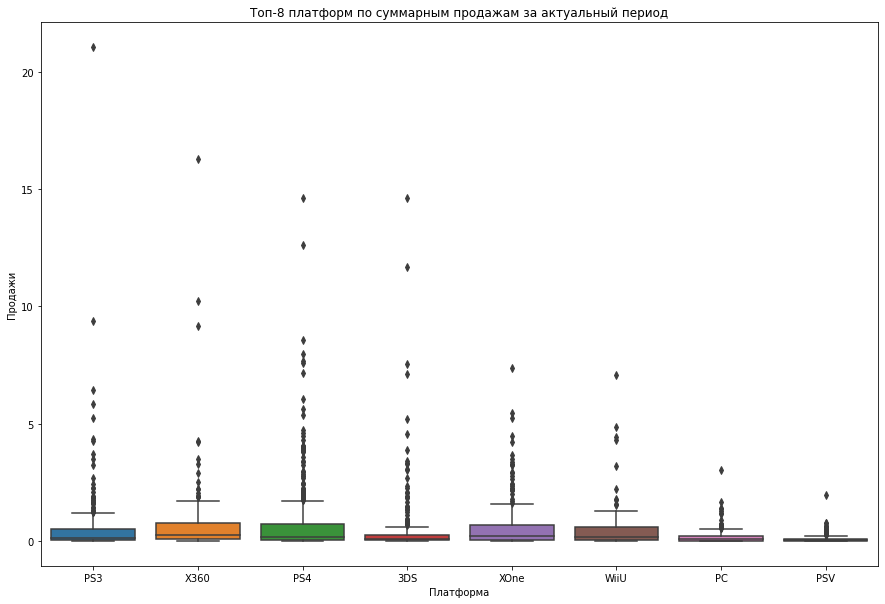

In [40]:
# построим диаграмму размаха для каждой платформы из топ-8
games_act_top_platform = games_act.query('platform in @top_platform_act.index')
plt.figure(figsize=(15, 10))
sns.boxplot(data=games_act_top_platform, x='platform', y='total_sales')
#plt.ylim(0, 3)
plt.xlabel('Платформа')
plt.ylabel('Продажи')
plt.title('Топ-8 платформ по суммарным продажам за актуальный период')

    Построим увеличенный график и используем describe().

Text(0.5, 1.0, 'Топ-8 платформ по суммарным продажам за актуальный период')

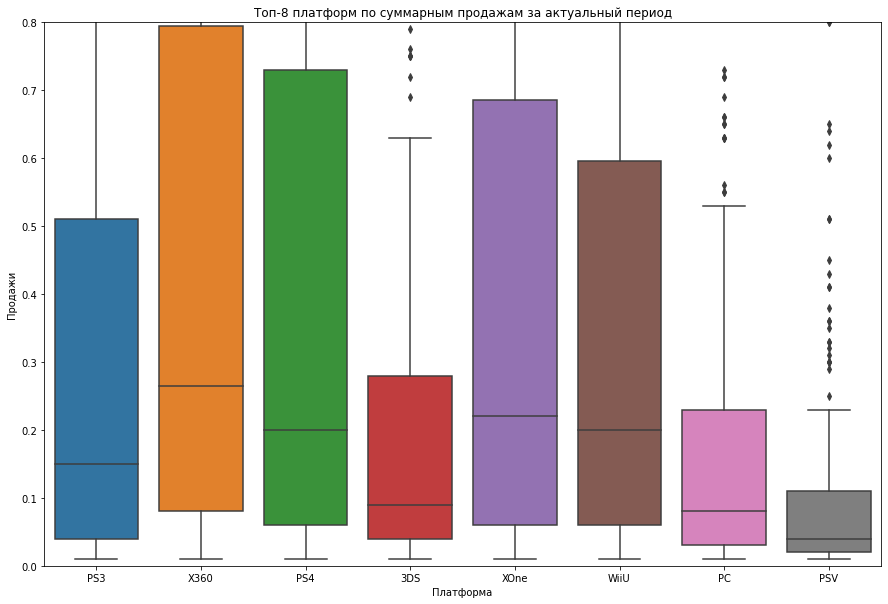

In [41]:
# построим диаграмму размаха для каждой платформы из топ-8, с увеличением диаграмм размаха
games_act_top_platform = games_act.query('platform in @top_platform_act.index')
plt.figure(figsize=(15, 10))
sns.boxplot(data=games_act_top_platform, x='platform', y='total_sales')
plt.ylim(0, 0.8)
plt.xlabel('Платформа')
plt.ylabel('Продажи')
plt.title('Топ-8 платформ по суммарным продажам за актуальный период')

In [42]:
games_act_top_platform.loc[games_act_top_platform['platform']=='PS3']['total_sales'].describe()

count    345.000000
mean       0.525884
std        1.451939
min        0.010000
25%        0.040000
50%        0.150000
75%        0.510000
max       21.050000
Name: total_sales, dtype: float64

In [43]:
games_act_top_platform.loc[games_act_top_platform['platform']=='PS4']['total_sales'].describe()

count    392.000000
mean       0.801378
std        1.609456
min        0.010000
25%        0.060000
50%        0.200000
75%        0.730000
max       14.630000
Name: total_sales, dtype: float64

In [44]:
games_act_top_platform.loc[games_act_top_platform['platform']=='XOne']['total_sales'].describe()

count    247.000000
mean       0.645020
std        1.036139
min        0.010000
25%        0.060000
50%        0.220000
75%        0.685000
max        7.390000
Name: total_sales, dtype: float64

In [45]:
games_act_top_platform.loc[games_act_top_platform['platform']=='X360']['total_sales'].describe()

count    186.000000
mean       0.735484
std        1.663275
min        0.010000
25%        0.080000
50%        0.265000
75%        0.795000
max       16.270000
Name: total_sales, dtype: float64

Большая часть игр у каждой платформы приносит доход в диапазоне до 0,5-0,8 млн, медианное значение в районе 0,2 млн за игру. Имеется большое количество выбросов - видимо это единичные игры с большим доходом (популярные игры). Т.е. у основной массы игр продажи небольшие, но большую долю продаж составляют популярные (хитовые) игры.

<a id = '11-bullet'></a>
#####     Посмотрим как влияют на продажи внутри платформы отзывы пользователей и критиков

Коэффициент корреляции 0.22


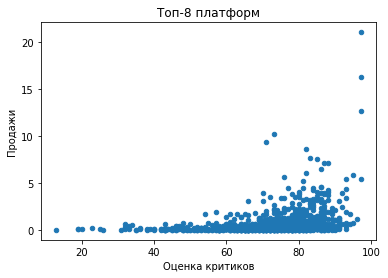

In [46]:
# постороим диаграмму рассеяния для топ-8 платформ по оценкам критиков и пользователей и посчитаем коэффициенты корреляции
games_act_top_platform[games_act_top_platform['critic_score']>0].plot(y='total_sales',x='critic_score', kind='scatter')
plt.xlabel('Оценка критиков')
plt.ylabel('Продажи')
plt.title('Топ-8 платформ')
print('Коэффициент корреляции', games_act_top_platform['total_sales'].corr(games_act_top_platform['critic_score']).round(2))

Коэффициент корреляции -0.0


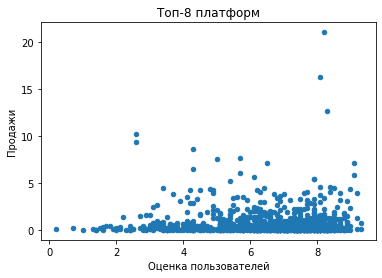

In [47]:
games_act_top_platform.plot(y='total_sales',x='user_score', kind='scatter')
plt.xlabel('Оценка пользователей')
plt.ylabel('Продажи')
plt.title('Топ-8 платформ')
print('Коэффициент корреляции', games_act_top_platform['total_sales'].corr(games_act_top_platform['user_score']).round(2))

In [48]:
# функцию для изучения корреляции между продажами и оценками критиков и пользователей для любой платформы

def platfotm_corr(p):
    games_act_top_platform[(games_act_top_platform['platform']==p)&(games_act_top_platform['critic_score']>0)].plot(
        y='total_sales',x='critic_score', kind='scatter')
    plt.xlabel('Оценка критиков')
    plt.ylabel('Продажи')
    plt.title(p)
    print('Коэффициент корреляции по оценкам критиков', games_act_top_platform[games_act_top_platform['platform']==p][
        'total_sales'].corr(games_act_top_platform[games_act_top_platform['platform']==p]['critic_score']).round(2))
    games_act_top_platform[games_act_top_platform['platform']==p].plot(y='total_sales',x='user_score', kind='scatter')
    plt.xlabel('Оценка пользователей')
    plt.ylabel('Продажи')
    plt.title(p)
    print('Коэффициент корреляции по оценкам пользователей', games_act_top_platform[games_act_top_platform['platform']==p][
        'total_sales'].corr(games_act_top_platform[games_act_top_platform['platform']==p]['user_score']).round(2))

Изучим корреляцию для нескольких платформ - с максимальными продажами за актуальный период, и две платформы отмеченные как перспективные.

Коэффициент корреляции по оценкам критиков 0.28
Коэффициент корреляции по оценкам пользователей 0.0


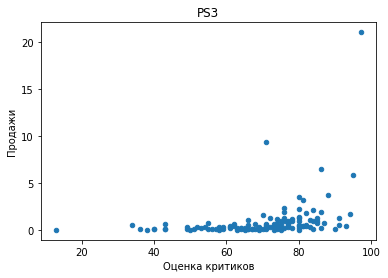

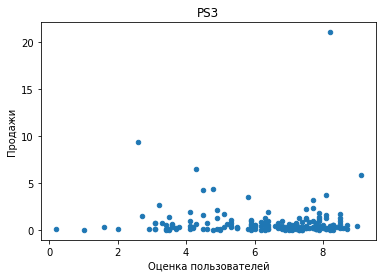

In [49]:
platfotm_corr('PS3')

Коэффициент корреляции по оценкам критиков 0.23
Коэффициент корреляции по оценкам пользователей -0.03


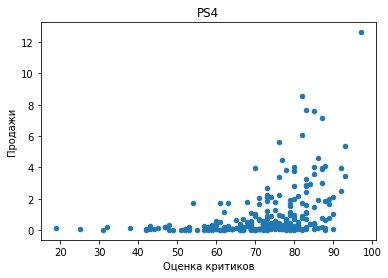

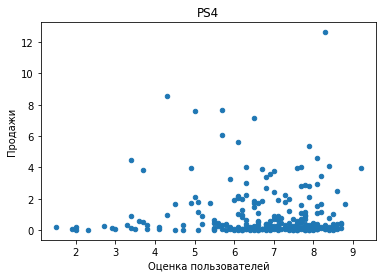

In [50]:
platfotm_corr('PS4')

Коэффициент корреляции по оценкам критиков 0.27
Коэффициент корреляции по оценкам пользователей -0.07


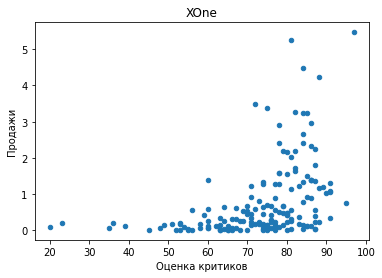

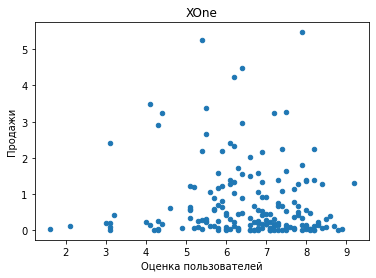

In [51]:
platfotm_corr('XOne')

    Оценки критиков демонстрируют прямую, средне-слабую корреляцию с продажами игр. Оценки пользователей корреляции с продажами не имеют. Но с точки зрения продаж логично обращать внимание хотябы на оценки критиков.

<a id = '12-bullet'></a>
#####     Посмотрим распределение игр по жанрам

In [52]:
genre_act = games_act.pivot_table(index='genre', values='total_sales', aggfunc=['sum', 'count', 'mean']).reset_index()
genre_act.columns = ['genre', 'total_sales', 'games', 'mean']
genre_act.sort_values(by = 'total_sales', ascending = False)

,genre,total_sales,games,mean
0,Action,321.87,766,0.420196
8,Shooter,232.98,187,1.245882
10,Sports,150.65,214,0.703972
7,Role-Playing,145.89,292,0.499623
3,Misc,62.82,155,0.405290
4,Platform,42.63,74,0.576081
6,Racing,39.89,85,0.469294
2,Fighting,35.31,80,0.441375
1,Adventure,23.64,245,0.096490
9,Simulation,21.76,62,0.350968


Text(0.5, 1.0, 'Распределение игр по жанрам')

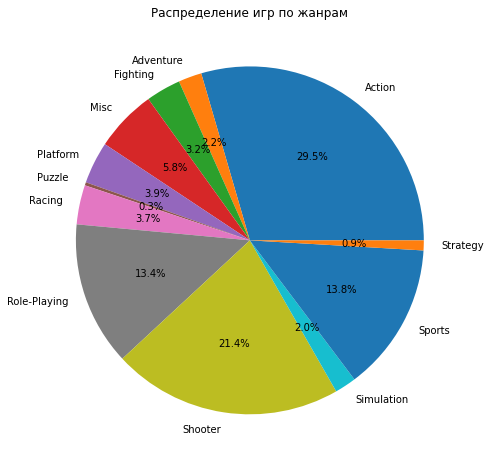

In [53]:
plt.figure(figsize=(10,8))
plt.pie(genre_act['total_sales'], labels=genre_act['genre'], autopct='%1.1f%%')
plt.title('Распределение игр по жанрам')

Самые прибыльные жанры по выборке за актуальный период это Экшены, Шутеры и спортивные и РПГ игры, при этом средняя цена игры у шутеров значительно выше, чем в остальных жанрах. Распределение между по жанрам с максимальными и минимальными продажами имеют существенную разницу по сумме продаж и количеству игр.

**Вывод**

    Данные представлены с 1980 года. Со временем количество игр постепенно увеличивалось, в 2000 количество выпускаемых игр стало расти быстрее, пик выпуска игр приходится на 2007-2009гг. После 2009г количество игр идет на спад, предполагаю это может быть связано с экономическим кризисом и последующим увеличением рынка мобильных игр. Для дальнейшего анализа можно не использовать данные до 1990 года, в связи со значительно меньшем количестве игр.
    Из построенных графиков и расчета средней продолжительности жизни платформы считаем, что актуальный период равен 7 годам. За последние 7 лет максимальные продажи у платформ PS3, X360, PS4. На 2016 год продажи по всем платформам идут на спад. Наибольшие продажи за 2016 по платформам PS4 и XOne, т.к. они являются относительно свежими и видимо наиболее востребованными и потенциально прибыльными на данный момент.
    Основную долю продаж по платформам составляют популярные (хитовые) игры.
    Была изучена корреляция для нескольких платформ - с максимальными продажами за актуальный период, и две платформы отмеченные как перспективные. Внутри платформ оценки критиков имеют слабое влияние на продажи игр, а оценки пользователей вообще практически не влияют.
    Самые прибыльные жанры по выборке за актуальный период это Экшены, Шутеры и спортивные и РПГ игры, при этом средняя цена игры у шутеров значительно выше, чем в остальных жанрах.

#### Портрет пользователя для каждого региона

<a id = '13-bullet'></a>
##### Самые популярные платформы (топ-5).

In [54]:
# создадим функцию для визуализации данных в разрезе определенного столбца данных и продажами в определенном регионе

def games_region(i, sales):

    games_top_platform_region = games_act.pivot_table(index=i, values=sales, aggfunc='sum').reset_index().sort_values(
        by = sales, ascending = False).head(5)

    display(games_top_platform_region)

    plt.figure(figsize=(5,5))
    plt.pie(games_top_platform_region[sales], labels=games_top_platform_region[i], autopct='%1.1f%%')
    plt.title('Распределение игр')

,platform,na_sales
4,PS4,108.74
10,XOne,93.12
9,X360,81.66
3,PS3,63.50
0,3DS,38.20


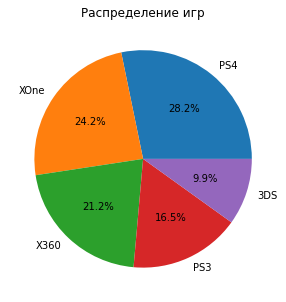

In [55]:
games_region('platform', 'na_sales')

,platform,eu_sales
4,PS4,141.09
3,PS3,67.81
10,XOne,51.59
9,X360,42.52
0,3DS,30.96


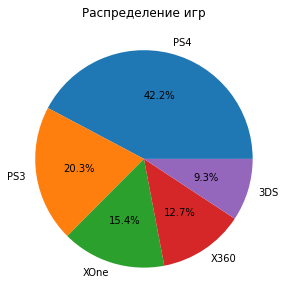

In [56]:
games_region('platform', 'eu_sales')

,platform,jp_sales
0,3DS,67.81
3,PS3,23.35
6,PSV,18.59
4,PS4,15.96
8,WiiU,10.88


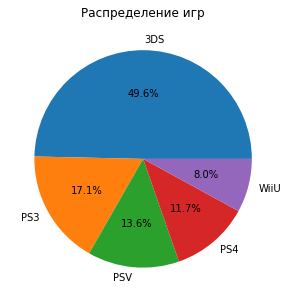

In [57]:
games_region('platform', 'jp_sales')

Самые популярные платформы для Америки и Европы это PS3, PS4 и ХOne, на них приходится более половины продаж. В Японии самые популярные платформы PS3  и 3DS. Вообще у Европы и Америки популярные платформы почти одни и теже, немного по другому распределены доли продаж. В Японии больше предпочитают портативные консоли.

<a id = '14-bullet'></a>
##### Самые популярные жанры(топ-5)

,genre,na_sales
0,Action,126.05
8,Shooter,109.74
10,Sports,65.27
7,Role-Playing,46.40
3,Misc,27.49


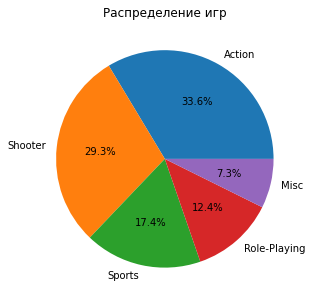

In [69]:
games_region('genre', 'na_sales')

,genre,eu_sales
0,Action,118.13
8,Shooter,87.86
10,Sports,60.52
7,Role-Playing,36.97
6,Racing,20.19


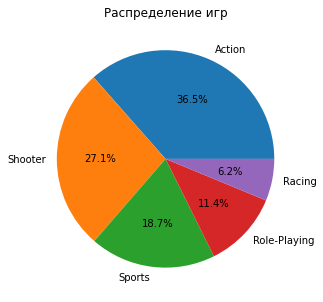

In [70]:
games_region('genre', 'eu_sales')

,genre,jp_sales
7,Role-Playing,51.04
0,Action,40.49
3,Misc,9.20
2,Fighting,7.65
8,Shooter,6.61


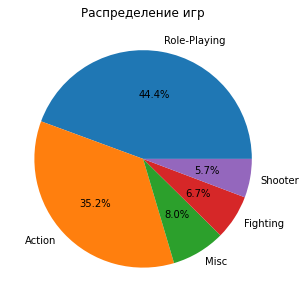

In [60]:
games_region('genre', 'jp_sales')

По жанрам также Америка и Европа предпочитают Экшены, Шутеры и спортивные игры, в Японии же на первом месте РПГ, хотя экшены тоже популярны.

<a id = '15-bullet'></a>
##### Рейтинги игр

     Система ESRB - США, Мексика и Канада
    EC	Для детей младшего возраста. Подходит для детей от 3 лет.
    K-A kids-to-adult детям и взрослым
    E	Подходит для всех возрастных категорий. 
    E 10+	Подходит для лиц старше 10 лет. 
    T	Подходит для лиц старше 13 лет. 
    M	Подходит для лиц старше 17 лет. 
    AO	Подходит для взрослых старше 18 лет. 
    RP	Категория ещё не присвоена. Играм с категорией RP еще не присвоен окончательный рейтинг ESRB.
    Заменим пустые значения на тип RP

,rating,na_sales
2,M,165.21
3,RP,89.42
0,E,79.05
1,E10+,54.24
4,T,49.79


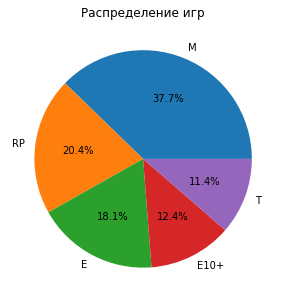

In [71]:
games_region('rating', 'na_sales')

,rating,eu_sales
2,M,145.32
0,E,83.36
3,RP,78.91
1,E10+,42.69
4,T,41.95


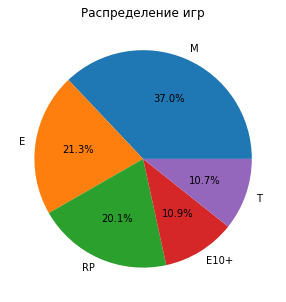

In [62]:
games_region('rating', 'eu_sales')

,rating,jp_sales
3,RP,85.05
4,T,20.59
0,E,15.14
2,M,14.11
1,E10+,5.89


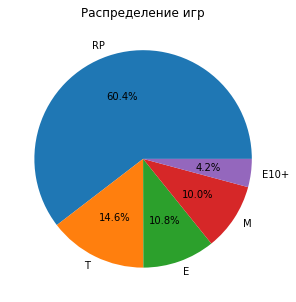

In [63]:
games_region('rating', 'jp_sales')

In [64]:
games_act.loc[games_act['rating']=='RP'].sort_values(by = 'jp_sales', ascending = False).head(15)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
33,pokemon x/pokemon y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,0,NaN,RP,14.60
385,monster hunter 4,3DS,2013,Role-Playing,0.00,0.00,3.44,0.00,0,NaN,RP,3.44
412,yokai watch 2 ganso/honke,3DS,2014,Role-Playing,0.09,0.00,3.18,0.01,0,NaN,RP,3.28
47,pokemon omega ruby/pokemon alpha sapphire,3DS,2014,Role-Playing,4.35,3.49,3.10,0.74,0,NaN,RP,11.68
406,monster hunter x,3DS,2015,Action,0.27,0.21,2.79,0.05,0,NaN,RP,3.32
563,yokai watch 2 shinuchi,3DS,2014,Role-Playing,0.00,0.00,2.68,0.00,0,NaN,RP,2.68
96,super smash bros. for wii u and 3ds,3DS,2014,Fighting,3.27,1.37,2.43,0.48,0,NaN,RP,7.55
694,yokai watch busters,3DS,2015,Action,0.00,0.00,2.29,0.00,0,NaN,RP,2.29
108,pokemon sun/moon,3DS,2016,Role-Playing,2.98,1.45,2.26,0.45,0,NaN,RP,7.14
184,tomodachi life,3DS,2013,Simulation,0.97,2.11,1.90,0.24,0,NaN,RP,5.22


По рейтингам у Европы и Америки тоже практически идентичное распределение, самый популярные игры с рейтингом для всей семьи. В Японии же самые популярные игры с неопределенным рейтингом, в основном это японские игры про Покемонов. 

**Вывод**

    Портрет пользователя для Америки и Европы будет практически идентичным, пользователи предпочитаю игры на PS3, PS4 и ХOne, Экшены, Шутеры и Спортивные игры желательно с рейтингом для всей семьи. В Японии отдают предпочтение играм на портативных консолях, в основном РПГ и предпочтительно про Покемонов.

<a id = '16-bullet'></a>
#### Проверка гипотез

#####  Средние пользовательские рейтинги платформ Xbox One и PC одинаковые

В данном случае нулевая гипотеза: средний пользовательский рейтинг платформы Xbox One = средний пользовательский рейтинг платформы PC. Альтернативная гипотеза: средний пользовательский рейтинг платформы Xbox One не равны среднего пользовательского рейтинга платформы PC.

Text(0.5, 0, 'Оценки пользователей')

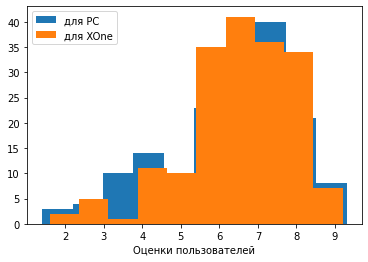

In [65]:
games_xone = games_act.loc[(games['platform']=='XOne')&(games['user_score'].isna()==False)]
games_pc = games_act.loc[(games['platform']=='PC')&(games['user_score'].isna()==False)]
plt.hist(games_pc['user_score'], bins=10, label='для PC')
plt.hist(games_xone['user_score'], bins=10, label='для XOne', stacked=True)
plt.legend()
plt.xlabel("Оценки пользователей")

In [66]:
alpha = 0.05

# проводим ttest для двух выборок, в качестве альтернативной используем одностороннюю гипотезу «больше»
results = st.ttest_ind(games_xone['user_score'], games_pc['user_score'], equal_var=False)

print(f'p-value: {results.pvalue}')

# проверяем p-value
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Нет оснований отвергнуть нулевую гипотезу')

p-value: 0.14759594013430463
Нет оснований отвергнуть нулевую гипотезу


   Нет оснований утверждать что средние пользовательские рейтинги для двух выбранных платформ различаются.

##### Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

В данном случае нулевая гипотеза: средний пользовательский рейтинг жанра Action = средний пользовательский рейтинг жанра Sports. Альтернативная гипотеза: средний пользовательский рейтинг жанра Action не равен среднему пользовательскому рейтингу жанра Sports.

Text(0.5, 0, 'Оценки пользователей')

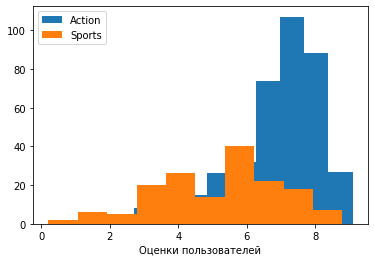

In [67]:
games_action = games_act.loc[(games['genre']=='Action')&(games['user_score'].isna()==False)]
games_sports = games_act.loc[(games['genre']=='Sports')&(games['user_score'].isna()==False)]
plt.hist(games_action['user_score'], bins=10, label='Аction')
plt.hist(games_sports['user_score'], bins=10, label='Sports', stacked=True)
plt.legend()
plt.xlabel("Оценки пользователей")

In [68]:


alpha = 0.05

# проводим ttest для двух выборок
results = st.ttest_ind(games_action['user_score'], games_sports['user_score'], equal_var=False)

print(f'p-value: {results.pvalue}')

# проверяем p-value
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Нет оснований отвергнуть нулевую гипотезу')

p-value: 1.4460039700704315e-20
Отвергаем нулевую гипотезу


Для жанров Action и Sports, нулевая гипотеза не подтвердилась, т.е средние пользовательские рейтинги жанров разные.

  По сути мы сравнивали средние двух генеральных совокупностей (независимых), поэтому нулевая гипотеза была сформулирована так: «средние значения совокупностей равны», а альтернативная «средние значения совокупностей не равны». Для проверки гипотез был использован метод для проверки гипотезы о равенстве среднего двух генеральных совокупностей по взятым из них выборкам: scipy.stats.ttest_ind(array1, array2, equal_var, alternative). Делали тест для неравных дисперсий и двухсторонней альтернативной гипотезы.

  Обе гипотезы подтвердились.
* Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
* Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.


<a id = '17-bullet'></a>
#### Общий вывод


        В ходе анализа данных был определен актуальный период работы игровой платформы, это 3-4 года. На текущий момент продажи по всем платформам идут на спад. Наибольшие продажи за 2016 по платформам PS4 и XOne, это самые свежие платформы, на них и стоит сделать основную ставку в компании 2017г. Таже предполагаем, что в ближайшее время будет выпуск новой игровой платформы от Sony, следует учесть этот факт в планировании рекламного бюджета.
       Для планирования на след год по регионам Америка и Европа следует отдать предпочтение хитовым играм (например те что регулярно выпускают новые части) по жанрам Экшен, Шутеры и спортивные игры, с рейтингом для всей семьи и для подростков.
       Для Японии следует выбирать игры в жанре РПГ и игры про Покемонов.
       Стоит выбирать инры с хорошими оценками критиков.</font>
